# Cancer death rate prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

In [3]:
data_frame=pd.read_csv('https://query.data.world/s/tsz7pgawspj35k6aimntckmzjd6set')

In [4]:
data_frame.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [5]:
data_frame.columns=['County','FIPS','45.5_objective','Adj.Death_rate','low_death_rate',
                    'upper_death_rate','avg_deaths','recent_trend','recent_5_year_trend','lower_trend','upper_trend']

In [6]:
data_frame.head()

,County,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [7]:
#there are values like '*','**' in the series of data_frame. replace them with np.nan value.
for cols in data_frame.columns:
    print(cols)
    print(data_frame[cols].unique())

County
['United States' 'Perry County, Kentucky' 'Powell County, Kentucky' ...
 'Zapata County, Texas' 'Zavala County, Texas'
 'Ziebach County, South Dakota']
FIPS
[    0 21193 21197 ... 48505 48507 46137]
45.5_objective
['No' 'Yes' '*']
Adj.Death_rate
['46' '125.6' '125.3' '124.9' '118.5' '113.5' '111.1' '110.3' '109.1'
 '106' '104.6' '103.5' '103.3' '98.7' '98.5' '97.2' '96.5' '96.1' '95.6'
 '95.3' '95.1' '94.9' '94.6' '92.7' '92.5' '92.3' '91.9' '90.8' '90.5'
 '90.2' '89.6' '89.3' '89.2' '89.1' '89' '88.9' '88' '87.9' '87.4' '87.2'
 '87' '86.8' '86.6' '85.9' '85.4' '85.1' '84.8' '84.5' '84.3' '84.2'
 '84.1' '84' '83.8' '83.6' '83.5' '83.1' '83' '82.7' '82.3' '82' '81.9'
 '81.7' '81.6' '81.5' '81.4' '81.3' '81.2' '81.1' '81' '80.8' '80.6'
 '80.5' '80.3' '80.2' '80.1' '80' '79.9' '79.8' '79.6' '79.5' '79.3'
 '79.1' '79' '78.8' '78.7' '78.5' '78.4' '78.3' '78.2' '78.1' '78' '77.8'
 '77.7' '77.6' '77.5' '77.4' '77.3' '76.9' '76.8' '76.7' '76.6' '76.4'
 '76.3' '76.2' '76.1' '76' '75.9' '

In [8]:
for cols in data_frame.columns:
    for j in data_frame[cols]:
        if j=='*':
            data_frame[cols].replace('*',np.nan,inplace=True)
        elif j=='**':
            data_frame[cols].replace('**',np.nan,inplace=True)

In [9]:
data_frame.head()

,County,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,NaN,NaN,NaN,NaN
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [10]:
#getting the number of null values of features. 
data_frame.isnull().sum()

County                   0
FIPS                     0
45.5_objective         328
Adj.Death_rate         328
low_death_rate         328
upper_death_rate       328
avg_deaths             328
recent_trend           447
recent_5_year_trend    447
lower_trend            447
upper_trend            447
dtype: int64

In [11]:
#getting categorical features.
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)

In [12]:
data_frame[categorical_features].head()

,County,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend
0,United States,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",No,124.9,73,194.7,5,NaN,NaN,NaN,NaN
4,"Owsley County, Kentucky",No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [13]:
#there are some numerical features in the form of categorical type. 
num_cat_columns=['Adj.Death_rate','low_death_rate','upper_death_rate','recent_5_year_trend','lower_trend','upper_trend']

In [14]:
data_frame[num_cat_columns].head()

,Adj.Death_rate,low_death_rate,upper_death_rate,recent_5_year_trend,lower_trend,upper_trend
0,46,45.9,46.1,-2.4,-2.6,-2.2
1,125.6,108.9,144.2,-0.6,-2.7,1.6
2,125.3,100.2,155.1,1.7,0,3.4
3,124.9,73,194.7,NaN,NaN,NaN
4,118.5,83.1,165.5,2.2,-0.4,4.8


In [15]:
#converting numeric string type values to numeric type values.
for cols in num_cat_columns:
    for j in data_frame[cols]:
        data_frame[cols].replace(j,float(j),inplace=True)

In [16]:
for cols in num_cat_columns:
    print(cols,data_frame[cols].dtype)

Adj.Death_rate float64
low_death_rate float64
upper_death_rate float64
recent_5_year_trend float64
lower_trend float64
upper_trend float64


In [17]:
data_frame['avg_deaths'].replace('157,376',157376,inplace=True)

In [18]:
for i in data_frame['avg_deaths'].unique():
    if type(i)==str:
        if ',' in i:
            data_frame['avg_deaths'].replace(i,i.replace(',',''),inplace=True)

In [19]:
data_frame['avg_deaths']=data_frame['avg_deaths'].astype(float)

In [20]:
data_frame.head()

,County,FIPS,45.5_objective,Adj.Death_rate,low_death_rate,upper_death_rate,avg_deaths,recent_trend,recent_5_year_trend,lower_trend,upper_trend
0,United States,0,No,46.0,45.9,46.1,157376.0,falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43.0,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18.0,stable,1.7,0.0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73.0,194.7,5.0,NaN,NaN,NaN,NaN
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8.0,stable,2.2,-0.4,4.8


In [21]:
for cols in data_frame.columns:
    print(cols,data_frame[cols].dtype)

County object
FIPS int64
45.5_objective object
Adj.Death_rate float64
low_death_rate float64
upper_death_rate float64
avg_deaths float64
recent_trend object
recent_5_year_trend float64
lower_trend float64
upper_trend float64


In [22]:
#converting the values in 'County' feature to 'state'.
data_frame['State']=data_frame['County'].copy()
for values in data_frame['State']:
    data_frame['State'].replace(values,values.split(', ')[-1],inplace=True)

In [23]:
#taking out the real numerical and categorical features.
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [24]:
print('categorical_features: ',categorical_features)
print('Numerical features: ',numerical_features)

categorical_features:  ['County', '45.5_objective', 'recent_trend', 'State']
Numerical features:  ['FIPS', 'Adj.Death_rate', 'low_death_rate', 'upper_death_rate', 'avg_deaths', 'recent_5_year_trend', 'lower_trend', 'upper_trend']


In [25]:
null_value_features=[]
for cols in data_frame.columns:
    percentage=(data_frame[cols].isnull().sum()/len(data_frame))*100 
    if percentage>0:
        null_value_features.append(cols)

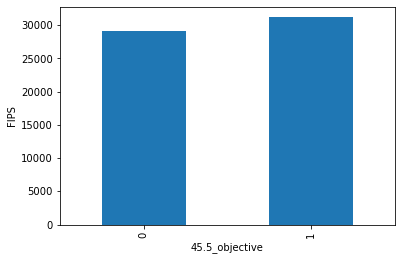

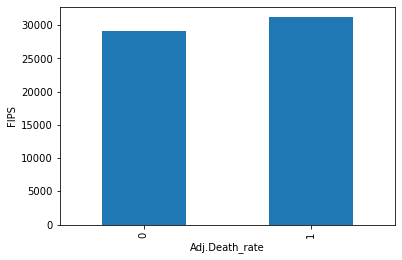

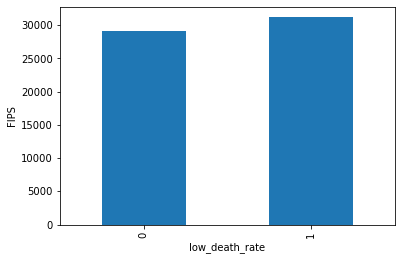

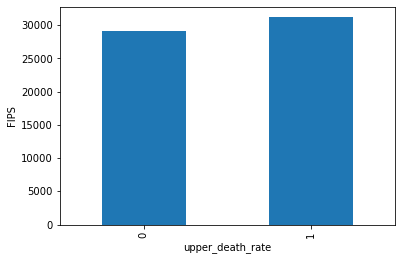

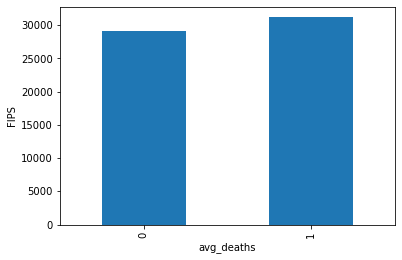

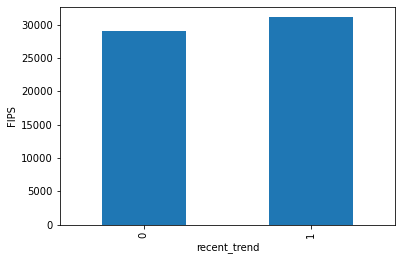

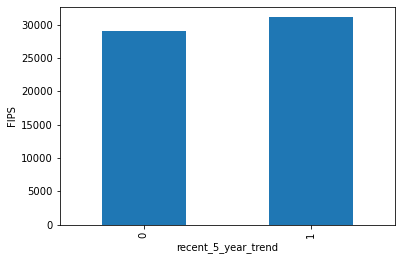

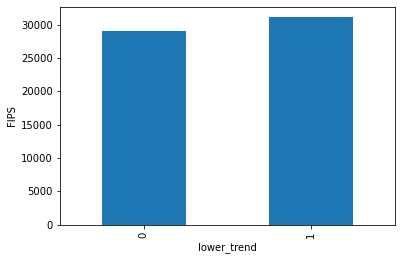

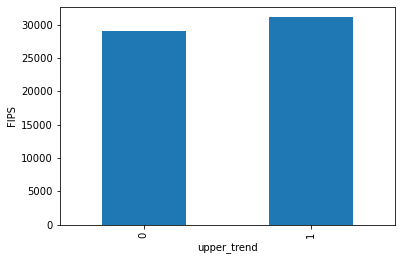

In [26]:
#finding the relationship between missing values features and dependent feature.
for cols in null_value_features:
    data=data_frame.copy()
    data[cols]=np.where(data[cols].isnull(),1,0)
    data.groupby(cols)['FIPS'].median().plot.bar()
    plt.ylabel('FIPS')
    plt.xlabel(cols)
    plt.show()

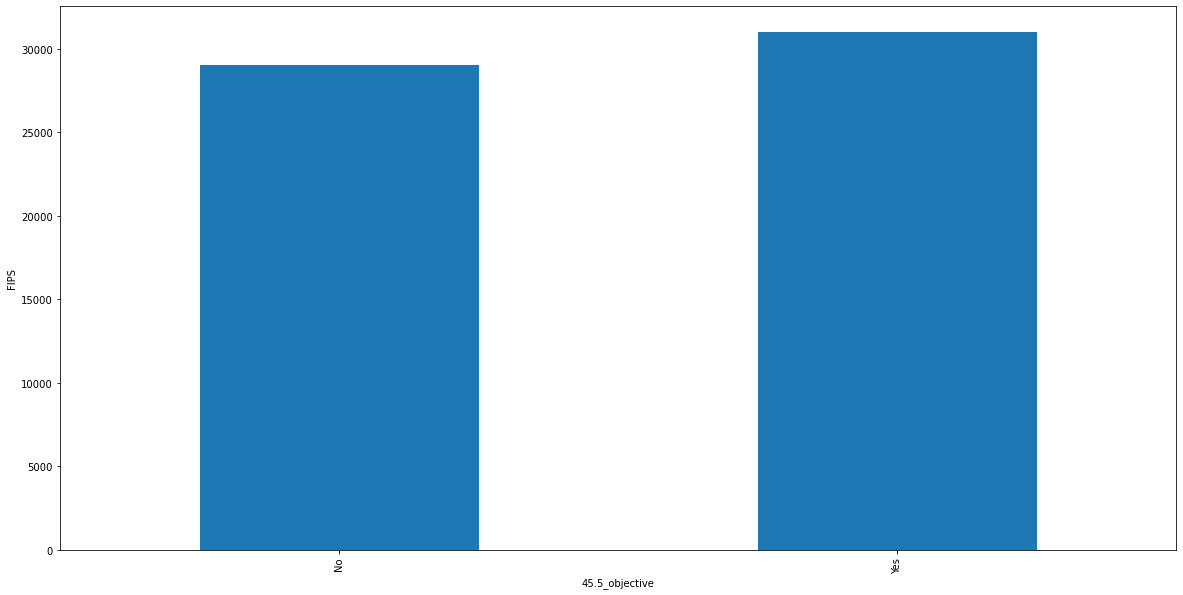

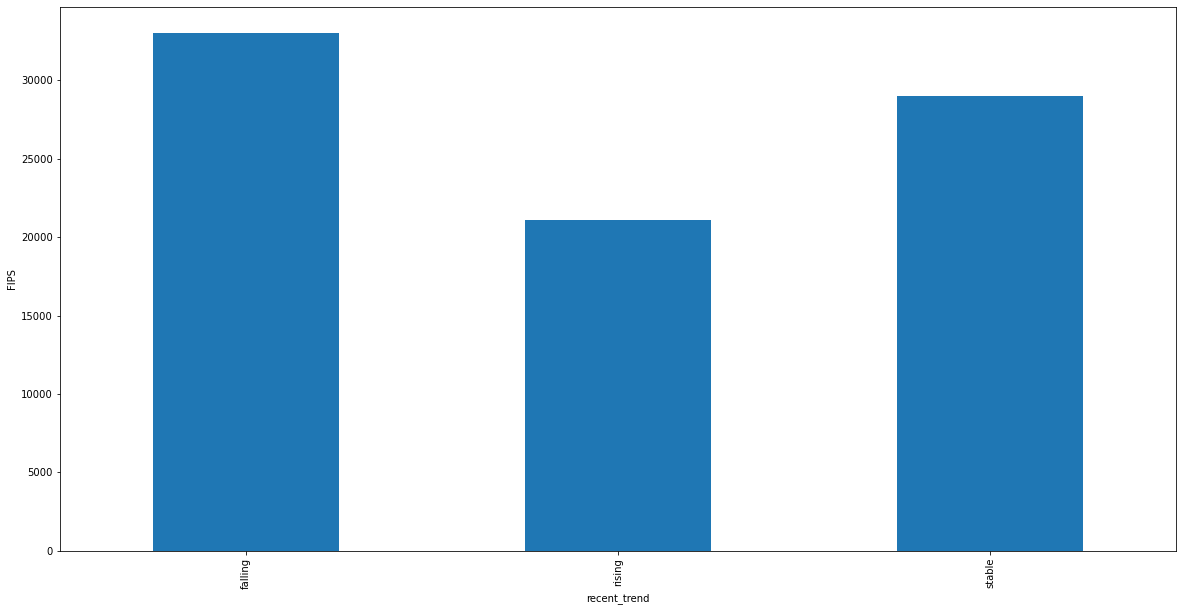

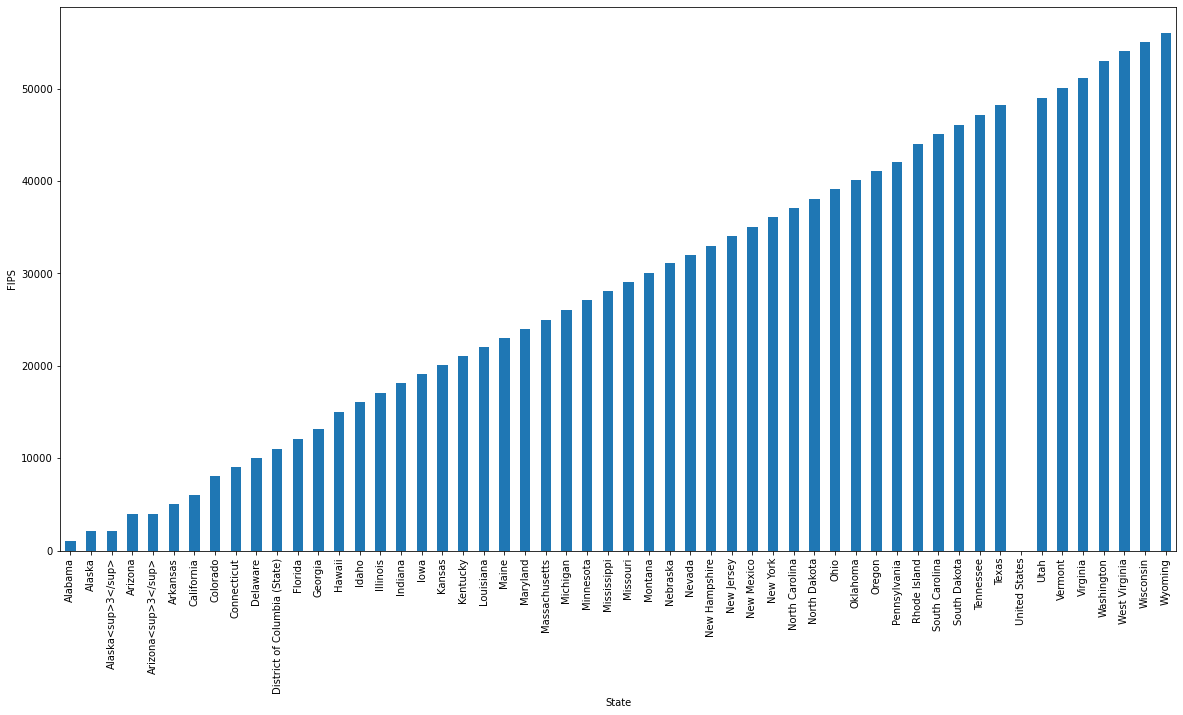

In [27]:
for cols in categorical_features:
    if cols!='County':
        data.groupby(cols)['FIPS'].median().plot.bar(figsize=(20,10))
        plt.xlabel(cols)
        plt.ylabel('FIPS')
        plt.show()

In [28]:
#there are few wrong categories in State feature.
data_frame['State'].unique()

array(['United States', 'Kentucky', 'Alaska', 'Florida', 'Arkansas',
       'Tennessee', 'Missouri', 'West Virginia', 'Texas', 'Mississippi',
       'Georgia', 'Virginia', 'Michigan', 'Minnesota', 'Oklahoma',
       'Indiana', 'Illinois', 'Kansas', 'Alabama', 'Louisiana',
       'North Dakota', 'North Carolina', 'Ohio', 'Idaho',
       'South Carolina', 'Wisconsin', 'Iowa', 'Maryland', 'Pennsylvania',
       'Nevada', 'Montana', 'Nebraska', 'New York', 'South Dakota',
       'Oregon', 'Washington', 'Maine', 'Wyoming', 'California',
       'Arizona', 'Vermont', 'Colorado', 'Delaware', 'New Jersey',
       'New Hampshire', 'Rhode Island', 'New Mexico', 'Massachusetts',
       'Connecticut', 'Utah', 'District of Columbia (State)',
       'Arizona<sup>3</sup>', 'Hawaii', 'Alaska<sup>3</sup>'],
      dtype=object)

In [29]:
#replacing those wrong categories.
data_frame['State'].replace('Arizona<sup>3</sup>','Arizona',inplace=True)
data_frame['State'].replace('Alaska<sup>3</sup>','Alaska',inplace=True)

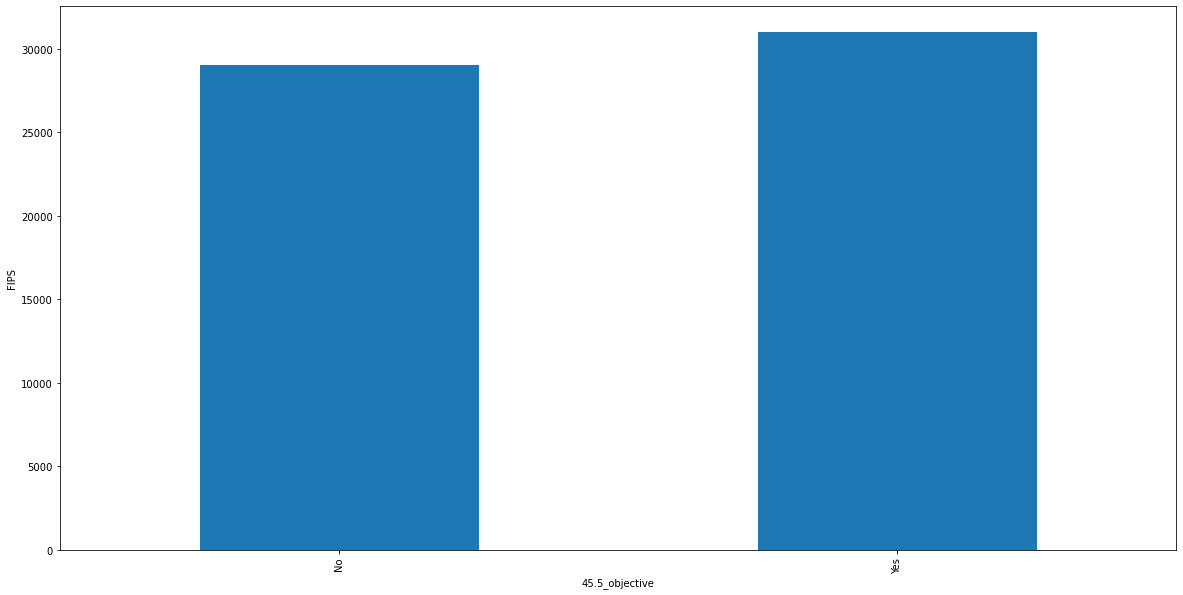

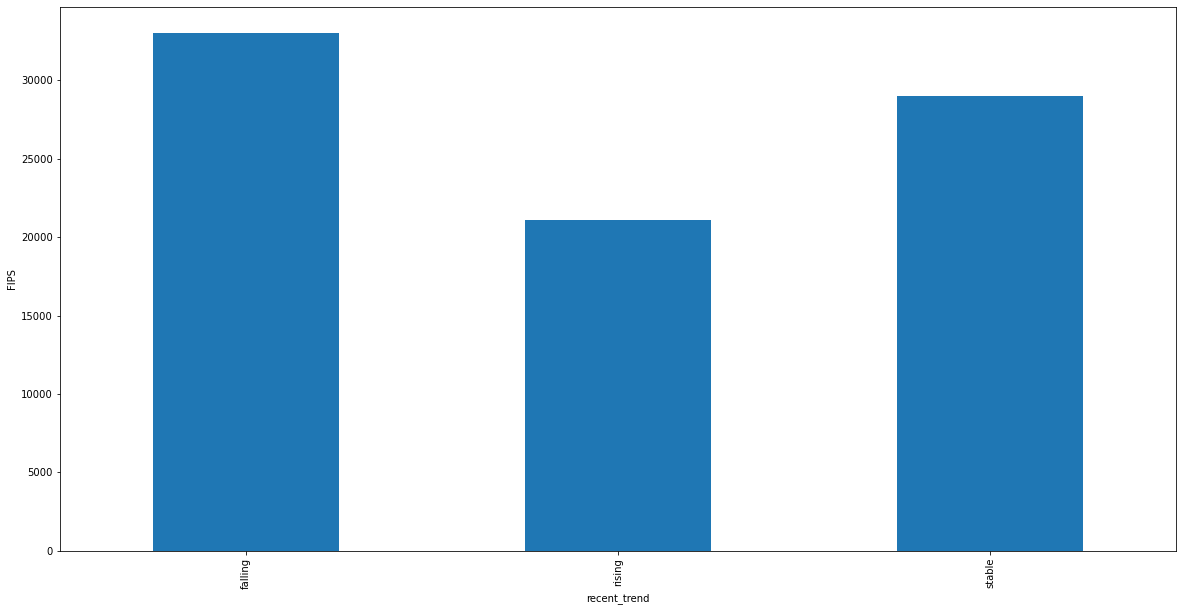

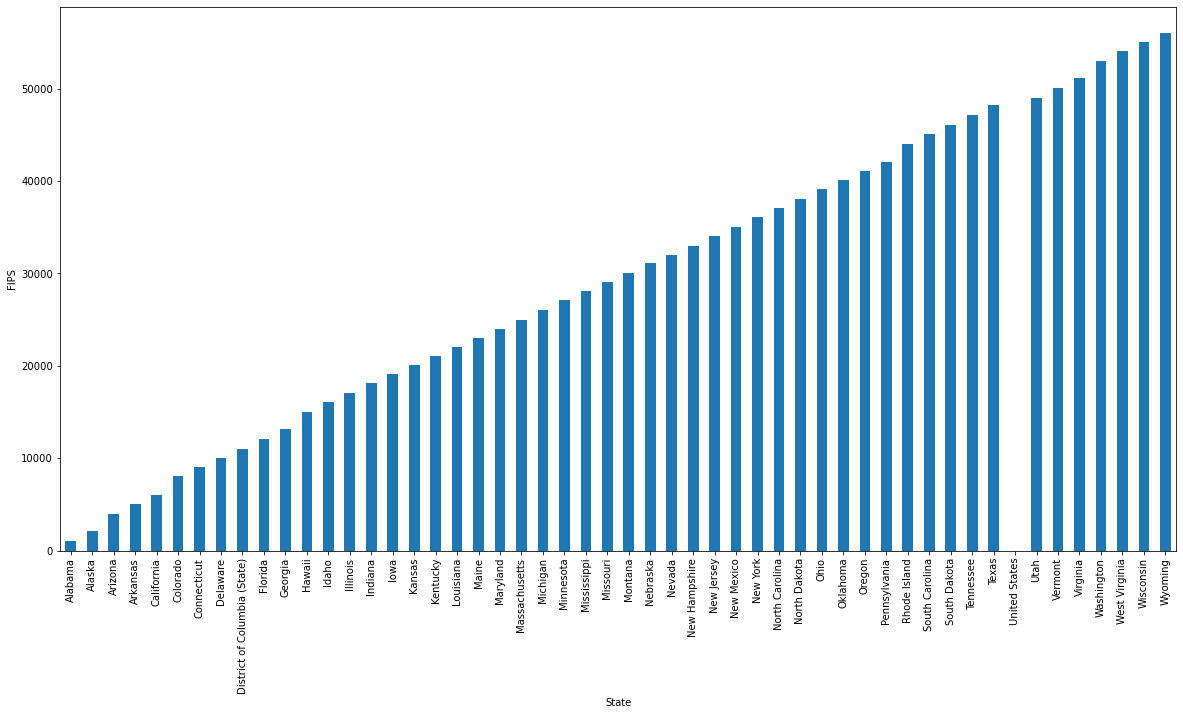

In [30]:
for cols in categorical_features:
    if cols!='County':
        data=data_frame.copy()
        data.groupby(cols)['FIPS'].median().plot.bar(figsize=(20,10))
        plt.xlabel(cols)
        plt.ylabel('FIPS')
        plt.show()

In [31]:
#visualizing the numerical variables
#getting the discrete and continous variables.
discrete=[]
continous=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continous.append(cols)
    else:
        discrete.append(cols)

In [32]:
print('Discrete: ',discrete)
print('Continous: ',continous)

Discrete:  []
Continous:  ['FIPS', 'Adj.Death_rate', 'low_death_rate', 'upper_death_rate', 'avg_deaths', 'recent_5_year_trend', 'lower_trend', 'upper_trend']


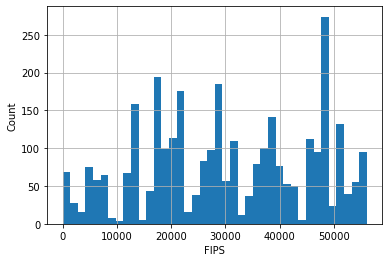

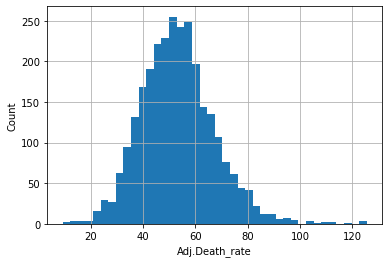

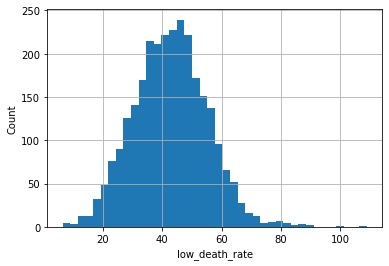

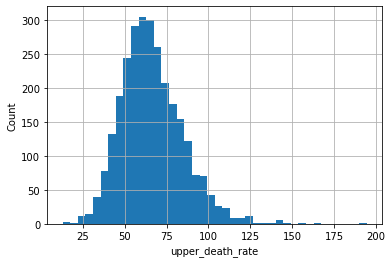

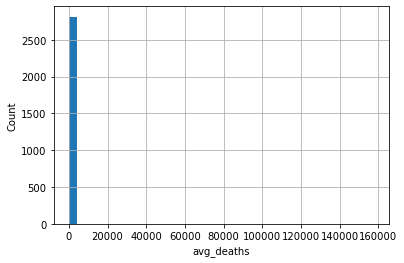

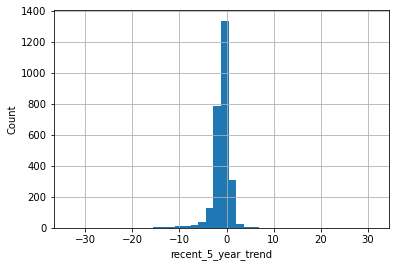

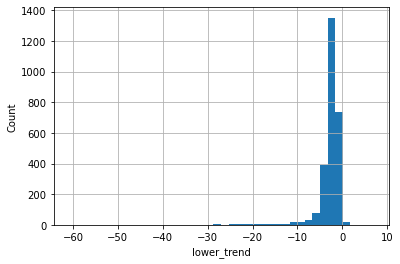

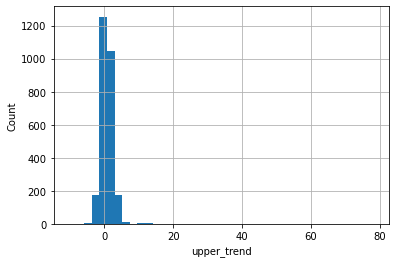

In [33]:
#there are no discrete features.
for cols in continous:
    data=data_frame.copy()
    data[cols].hist(bins=40)
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.show()

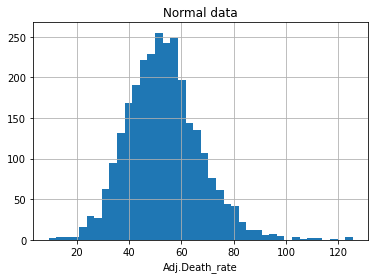

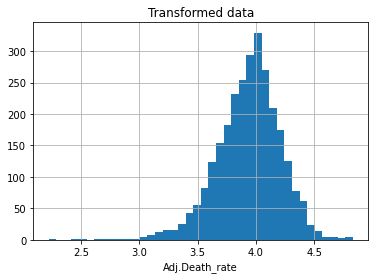

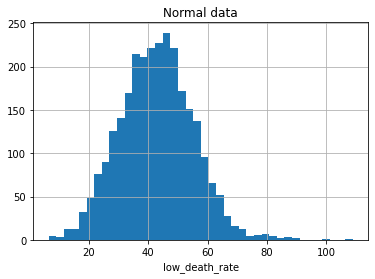

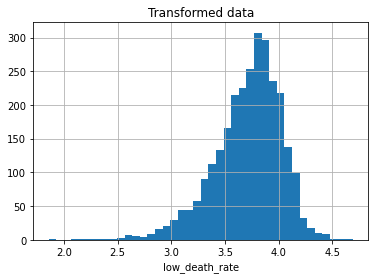

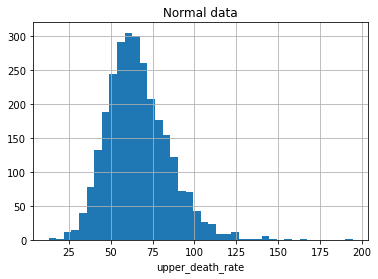

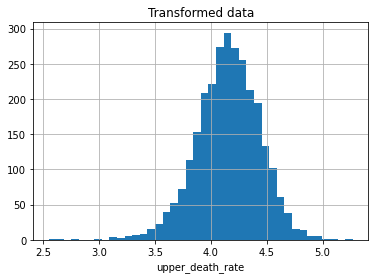

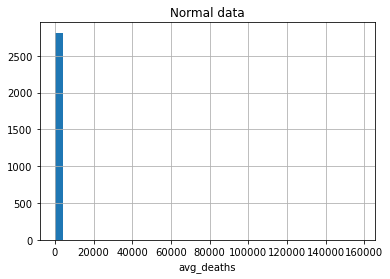

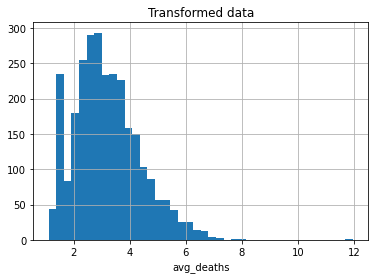

In [34]:
#some features are getting skewed more after transformation.
for cols in continous:
    data=data_frame.copy()
    if 0 in data[cols].unique():
        pass
    else:
        plt.title('Normal data')
        data[cols].hist(bins=40)
        plt.xlabel(cols)
        plt.show()
        plt.title('Transformed data')
        data[cols]=np.log(data[cols])
        data[cols].hist(bins=40)
        plt.xlabel(cols)
        plt.show()

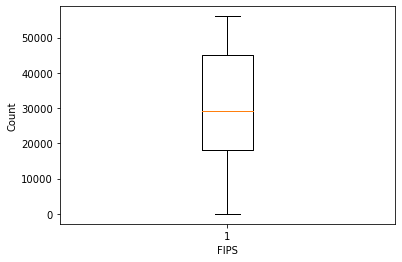

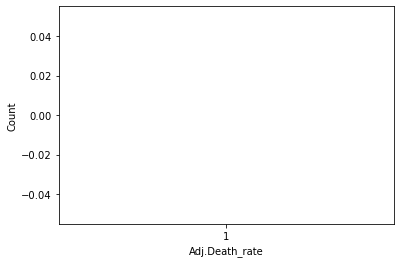

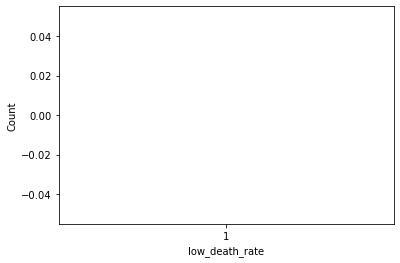

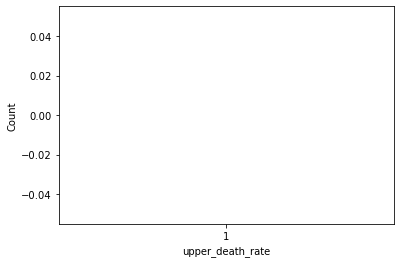

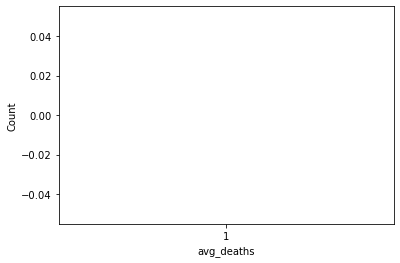

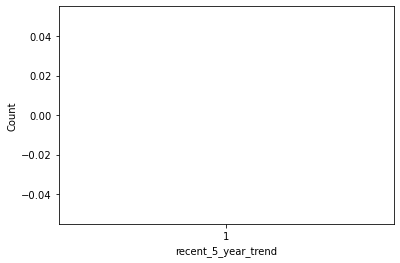

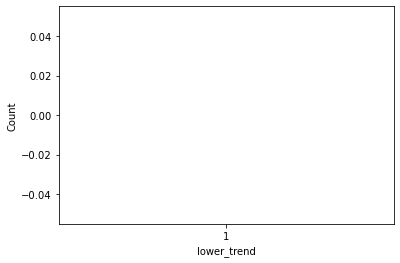

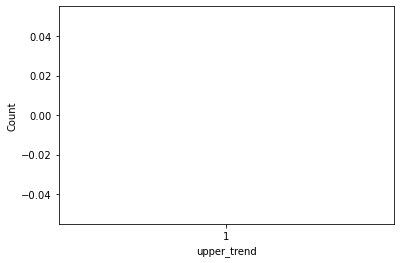

In [35]:
#finding the outliers for the continous features.
for cols in continous:
    plt.boxplot(data_frame[cols])
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.show()

In [36]:
#looks that there's no outliers in the continous features.

In [37]:
#saving the dataframe to a file.
data_frame.to_csv('cancer_dataset.csv',index=False)